# Linear Regression on Boston Housing Dataset


The price of a house depends on many features. We have information about many houses in Boston. This ML model will predict the price of a house.

Dataset: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

We have this features:

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

- LSTAT: Percentage of lower status of the population

- MEDV: Median value of owner-occupied homes in $1000s

<img src=https://miro.medium.com/max/1400/1*FHQOSHMMT07CbXpklk1Ehw.jpeg>

In [3]:
## Import the Libreries

import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# To connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read dataset
df_boston = pd.read_csv('/content/drive/MyDrive/Python/boston_housing.csv')

### Analyse dataset

In [5]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Validate null values
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


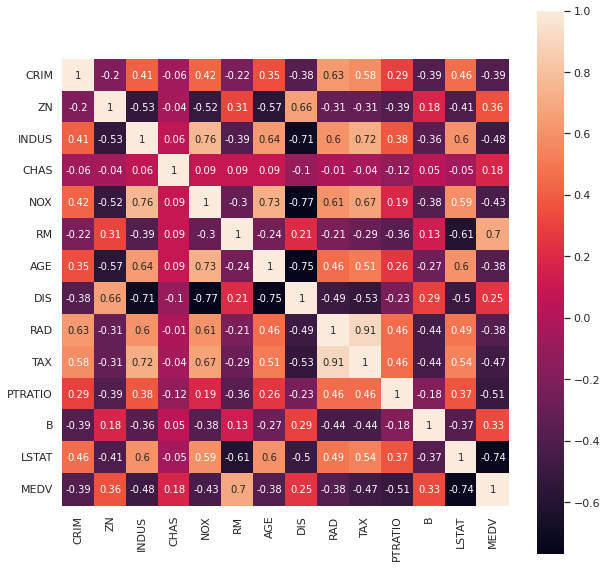

In [9]:
# Analyse correlation between the features
corr = df_boston.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, annot=True, annot_kws={'size':10})

- The features INDUS, RM, TAX, PTRATIO, LSTAT has a high correlation with the target MEDV.

- In the features RAD and TAX we have multi-co-linearity. Only select one of them. We select TAX, because the correlation is greater than the RAD with the Target.

- In the features AGE and DIS we have multi-co-linearity. Only select one of them. We select AGE, because the correlation is greater than the DIS with the Target.

The features with the highest correlation are LSTAT and RM. Plot this feature with the target.

In [13]:
## Divide the features and the target
target = 'MEDV'
X = df_boston.drop(target, axis = 1) # Drop column target in train dataset
y = df_boston[target] # Define target

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
## Remove the features of the dataset
X = X.drop(['RAD'], axis=1)
X = X.drop(['DIS'], axis=1)

In [18]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,222.0,18.7,396.90,5.33


## Define Train y Test

The function 'train_test_split' allows us divide randomly the data in different datasets to train and test our model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [21]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,247.0,18.5,396.90,9.62
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,334.0,22.0,382.80,8.05
221,0.40771,0.0,6.20,1.0,0.507,6.164,91.3,307.0,17.4,395.24,21.46
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,307.0,21.0,248.31,20.34
267,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,264.0,13.0,384.54,7.44


In [22]:
y_train.head()

84     23.9
354    18.2
221    21.7
34     13.5
267    50.0
Name: MEDV, dtype: float64

## Linear Regression Model

Import the model using the library scikit learn

In [24]:
## Import
from sklearn.linear_model import LinearRegression

In [26]:
## Define the model
lr_multiple = LinearRegression()

In [27]:
## Train the model
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [28]:
## Predict using the model
y_train_pred = lr_multiple.predict(X_train)
y_test_pred = lr_multiple.predict(X_test)

Evaluate the model using RMSE y R2 Score

In [29]:
## Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
print('RMSE train:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE train: 4.778977297286669
RMSE test: 5.732245879289699


Evaluate the model using R2 and R2 adjusted

In [32]:
r2 = metrics.r2_score(y_test, y_test_pred)
r2

0.6853225428542129

In [37]:
r2_adjusted = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
r2_adjusted

0.6605978855070439